In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [30]:
cd ../data

/Users/johnwalecka/Desktop/Springboard/march_madness/march_madness_repo/data


In [31]:
tourney_results_2015 = pd.read_csv('MNCAATourneyCompactResults.csv', index_col ='Season').loc['2015', ['WTeamID', 'LTeamID']].reset_index()
tourney_results_2016 = pd.read_csv('MNCAATourneyCompactResults.csv', index_col ='Season').loc['2016', ['WTeamID', 'LTeamID']].reset_index()
tourney_results_2017 = pd.read_csv('MNCAATourneyCompactResults.csv', index_col ='Season').loc['2017', ['WTeamID', 'LTeamID']].reset_index()
tourney_results_2018 = pd.read_csv('MNCAATourneyCompactResults.csv', index_col ='Season').loc['2018', ['WTeamID', 'LTeamID']].reset_index()
tourney_results_2019 = pd.read_csv('MNCAATourneyCompactResults.csv', index_col ='Season').loc['2019', ['WTeamID', 'LTeamID']].reset_index()
tourney_seeds_2015 = pd.read_csv('MNCAATourneySeeds.csv', index_col ='Season').loc['2015'].set_index('TeamID')
tourney_seeds_2016 = pd.read_csv('MNCAATourneySeeds.csv', index_col ='Season').loc['2016'].set_index('TeamID')
tourney_seeds_2017 = pd.read_csv('MNCAATourneySeeds.csv', index_col ='Season').loc['2017'].set_index('TeamID')
tourney_seeds_2018 = pd.read_csv('MNCAATourneySeeds.csv', index_col ='Season').loc['2018'].set_index('TeamID')
tourney_seeds_2019 = pd.read_csv('MNCAATourneySeeds.csv', index_col ='Season').loc['2019'].set_index('TeamID')

results_list = [tourney_results_2015, tourney_results_2016, tourney_results_2017, tourney_results_2018, tourney_results_2019]
seeds_list = [tourney_seeds_2015, tourney_seeds_2016, tourney_seeds_2017, tourney_seeds_2018, tourney_seeds_2019]


In [32]:
col_names = ['seed_1_wins', 'seed_2_wins', 'seed_3_wins', 'seed_4_wins', 'seed_5_wins', 'seed_6_wins', 'seed_7_wins', 'seed_8_wins', 'seed_9_wins', 'seed_10_wins', 'seed_11_wins', 'seed_12_wins', 'seed_13_wins', 'seed_14_wins', 'seed_15_wins', 'seed_16_wins']
num_seeds = len(col_names)
wins_dict = dict()

In [33]:
tourney_seeds_2015.head()

,Seed
TeamID,
1437,W01
1438,W02
1328,W03
1257,W04
1320,W05


In [34]:
def is_play_in_team(team_id, df):
    seed = df.loc[team_id, 'Seed']
    str_len = len(seed)
    return ((seed[str_len - 1] == 'a') or (seed[str_len - 1] == 'b'))

In [35]:
def first_team_wins(team_1_id, team_2_id, df_results):
    for index, row in df_results.iterrows():
        winner_id = df_results.iloc[index]['WTeamID']
        loser_id = df_results.iloc[index]['LTeamID']
        if ((winner_id == team_1_id) and (loser_id == team_2_id)):
            return True
    return False

In [36]:
def update_seed(team_id, df_seeds):
    df_seeds.loc[team_id, 'Seed'] = df_seeds.loc[team_id, 'Seed'][:-1]

In [37]:
def play_play_in_games(df_seeds, df_results):
    drop_indices = list()
    team_ids = df_seeds.index.values
    num_teams = len(df_seeds)
    for index in range(0, num_teams - 1):
        team_1_id = team_ids[index]
        team_2_id = team_ids[index + 1]
        if (is_play_in_team(team_1_id, df_seeds) and is_play_in_team(team_2_id, df_seeds)):
            if first_team_wins(team_1_id, team_2_id, df_results):
                drop_indices.append(team_2_id)
                update_seed(team_1_id, df_seeds)
            if first_team_wins(team_2_id, team_1_id, df_results):
                drop_indices.append(team_1_id)
                update_seed(team_2_id, df_seeds)
    df_seeds.drop(drop_indices, inplace = True)

In [38]:
def calculate_wins(df_teams, df_results, wins_list):
    games_per_region = 8
    teams = df_teams.index
    for i in range(0, games_per_region):
        team_1_id = teams[i]
        team_2_id = teams[len(df_teams) - 1 - i]
        if first_team_wins(team_1_id, team_2_id, df_results):
            wins_list[i] += 1
        else:
            wins_list[num_seeds - i - 1] += 1
            

In [39]:
def generate_wins_dict(df_seeds, df_results, curr_year):
    num_regions = 4
    year_wins_list = [0]*num_seeds
    for i in range(0, num_regions):
        lower_bound = i*num_seeds
        upper_bound = (i + 1)*num_seeds
        region_teams = df_seeds.iloc[lower_bound:upper_bound]
        calculate_wins(region_teams, df_results, year_wins_list)
    wins_dict[curr_year] = year_wins_list

In [40]:
init_year = 2015
for i in range(0, 5):
    curr_seeds = seeds_list[i]
    curr_results = results_list[i]
    curr_year = init_year + i
    play_play_in_games(curr_seeds, curr_results)
    generate_wins_dict(curr_seeds, curr_results, curr_year)
wins_df = pd.DataFrame.from_dict(wins_dict, orient='index',
                       columns=col_names)
wins_df.loc['mean'] = wins_df.mean()

In [41]:
wins_df.head(10)

,seed_1_wins,seed_2_wins,seed_3_wins,seed_4_wins,seed_5_wins,seed_6_wins,seed_7_wins,seed_8_wins,seed_9_wins,seed_10_wins,seed_11_wins,seed_12_wins,seed_13_wins,seed_14_wins,seed_15_wins,seed_16_wins
2015,4.0,4.0,2.0,4.0,4.0,2.0,3.0,4.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0
2016,4.0,3.0,3.0,3.0,2.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,1.0,1.0,1.0,0.0
2017,4.0,4.0,4.0,4.0,3.0,1.0,3.0,3.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0
2018,3.0,4.0,4.0,2.0,4.0,2.0,3.0,1.0,3.0,1.0,2.0,0.0,2.0,0.0,0.0,1.0
2019,4.0,4.0,4.0,3.0,1.0,3.0,1.0,0.0,4.0,3.0,1.0,3.0,1.0,0.0,0.0,0.0
mean,3.8,3.8,3.4,3.2,2.8,1.8,2.4,1.8,2.2,1.6,2.2,1.2,0.8,0.6,0.2,0.2


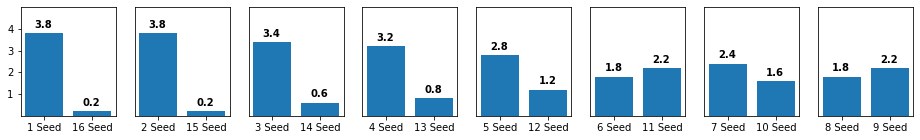

In [42]:
x = range(2)
num_seeds = 16
num_plots = 8
plt.figure(figsize=(16,2))
for i in range(num_plots):
    plt.subplot(1, 8, i + 1)
    high_seed = col_names[i]
    low_seed = col_names[-i - 1]
    high_seed_label = str(i + 1) + ' Seed'
    low_seed_label = str(num_seeds - i) + ' Seed'
    values = wins_df.loc['mean', [high_seed, low_seed]]
    dist = plt.bar(x, values)
    plt.yticks(range(1, 6, 1), ['1', '2', '3', '4', ''])
    plt.xticks(x, [high_seed_label, low_seed_label], rotation='horizontal')
    ax = plt.gca()
    if i == 0:
        y_ticks = ax.yaxis.get_major_ticks()
        y_ticks[4].set_visible(False)
    else:
        ax.yaxis.set_visible(False)
    for i, v in enumerate(values):
        plt.text(i - .2, v + 0.25, str(v), color='black', fontweight='bold')

plt.show()